<a href="https://colab.research.google.com/github/Narichie/Covid_19/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing the Impact and Trends of COVID-19 Across U.S. Midwest Counties.

----------------------
 ### **Introduction**
 ----------------------
The COVID-19 pandemic has profoundly impacted the economic and societal structures across the U.S., with rural and urban areas experiencing divergent outcomes. The proposed project aims to assess these disparities within the Midwest region, applying advanced analytics techniques to explore the effects on healthcare access, economic stability, and societal shifts like migration. By examining publicly available datasets from national and regional sources, this research seeks to uncover key trends that could inform policy and resource allocation decisions in the post-pandemic recovery.

----------------------
#### **Objective**
----------------------
•	Generate actionable insights through visualization techniques such as scatter plots and heatmaps to understand the spread and severity of COVID-19 at the county level.

•   Visualize and explore the distribution of COVID-19-positive cases and death counts across U.S. Midwest counties.

•    Perform correlation analysis to identify relationships between key COVID-19 metrics, including positive case counts, new cases, and death counts.

• Identify high-impact counties with the highest number of cases and deaths and investigate potential patterns.

----------------------
#### **Research question**
----------------------
•	How do COVID-19 metrics such as positive cases, new cases, and death counts vary across U.S. Midwest counties, and what correlations and trends can be identified from the data?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

# Helps on better visalization of graphs
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [ ]:
# Load datasets
Covid_19 = pd.read_csv('Covid_19_Data.csv')

In [ ]:
Covid_19.head()

,people_positive_cases_count,county,State,Date,people_death_new_count,county_fips_number,people_positive_new_cases_count,people_death_count
0,0,Bond,Illinois,1/22/20,0,17005.0,0,0
1,0,Bond,Illinois,1/23/20,0,17005.0,0,0
2,0,Bond,Illinois,1/24/20,0,17005.0,0,0
3,0,Bond,Illinois,1/25/20,0,17005.0,0,0
4,0,Bond,Illinois,1/26/20,0,17005.0,0,0


In [ ]:
Covid_19.tail()

,people_positive_cases_count,county,State,Date,people_death_new_count,county_fips_number,people_positive_new_cases_count,people_death_count
321973,56673,Racine,Wisconsin,4/25/22,0,55101.0,70,688
321974,56698,Racine,Wisconsin,4/26/22,0,55101.0,25,688
321975,56735,Racine,Wisconsin,4/27/22,0,55101.0,37,688
321976,56753,Racine,Wisconsin,4/28/22,0,55101.0,18,688
321977,56801,Racine,Wisconsin,4/29/22,0,55101.0,48,688


/var/folders/k_/ynncgkcj0j7d7nk5gy9qdwr80000gn/T/ipykernel_15188/2221154125.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Covid_19.corr()['people_positive_cases_count'].sort_values(ascending=False)


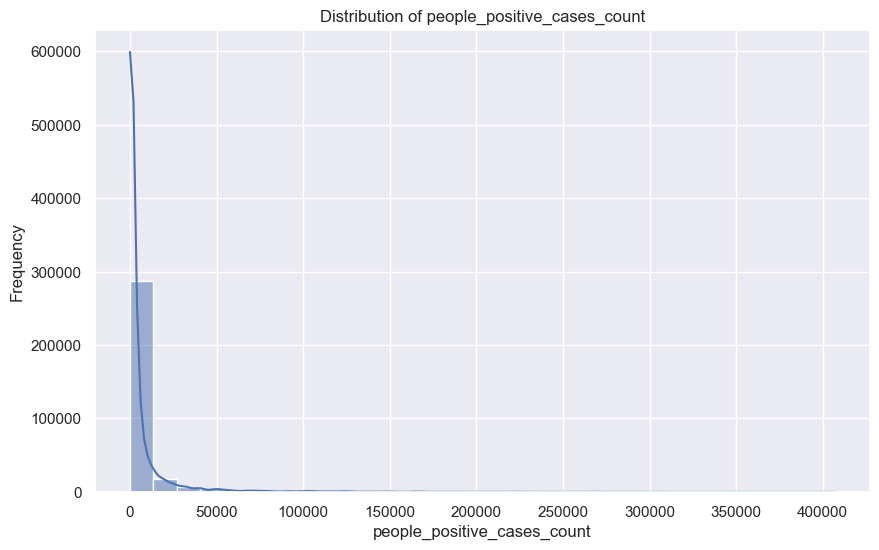

/var/folders/k_/ynncgkcj0j7d7nk5gy9qdwr80000gn/T/ipykernel_15188/2221154125.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Covid_19.corr(), cmap='coolwarm', annot=False, fmt=".2f")


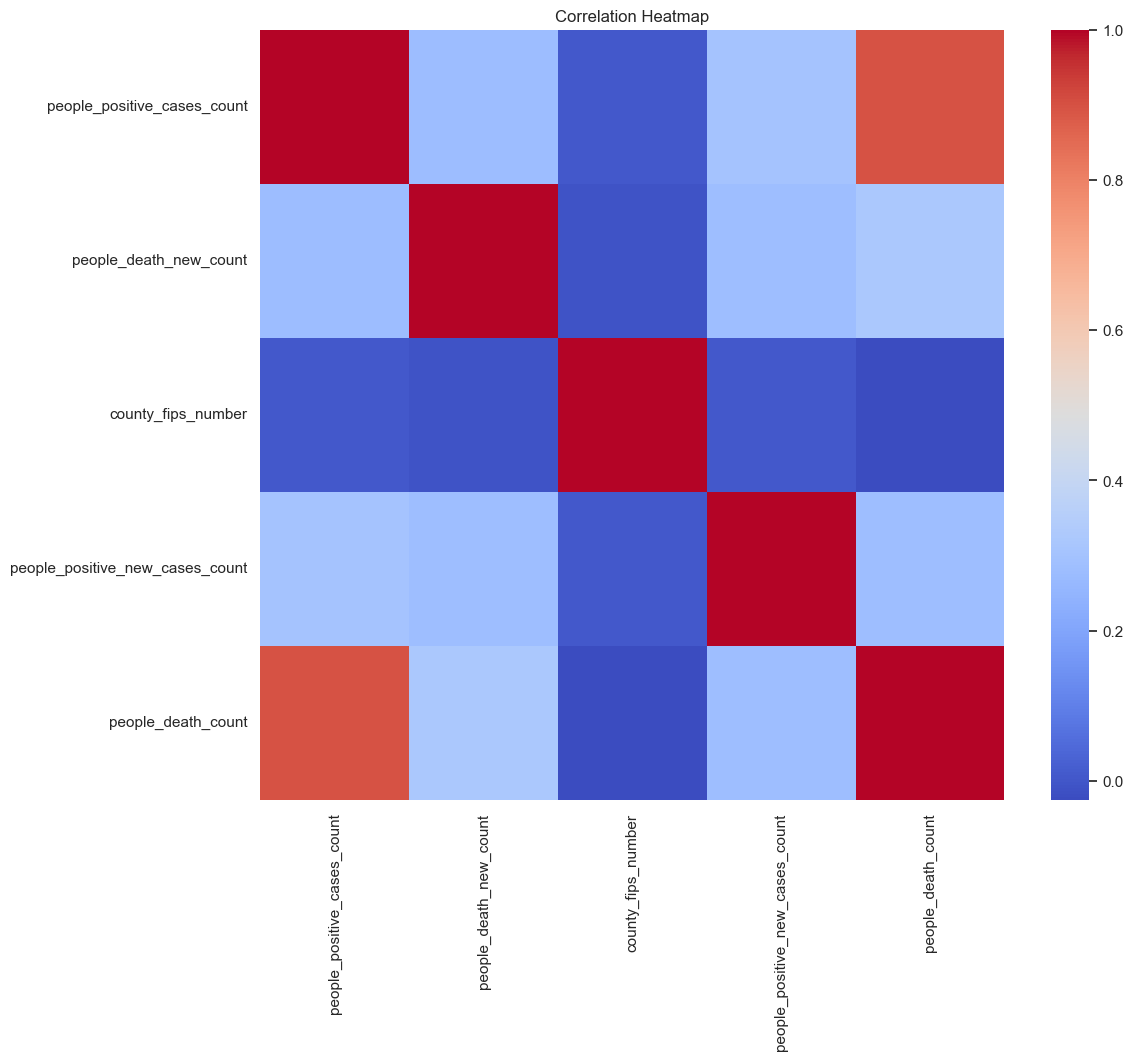

(       people_positive_cases_count  people_death_new_count  \
 count                321978.000000           321978.000000   
 mean                   6945.969712                0.285802   
 std                   21208.672397                1.950921   
 min                       0.000000             -155.000000   
 25%                     132.000000                0.000000   
 50%                    1210.000000                0.000000   
 75%                    4586.000000                0.000000   
 max                  406822.000000              213.000000   
 
        county_fips_number  people_positive_new_cases_count  people_death_count  
 count       317833.000000                    321978.000000       321978.000000  
 mean         29002.368278                        23.205893          105.833777  
 std          10857.578379                       190.188563          350.488182  
 min          17005.000000                    -25857.000000            0.000000  
 25%          19041.0

In [ ]:
#Descriptive statistics of the dataset
desc_stats = Covid_19.describe()

# Checking for missing values
missing_values = Covid_19.isnull().sum()

# Correlation matrix focusing on people_positive_cases_count
correlation_matrix = Covid_19.corr()['people_positive_cases_count'].sort_values(ascending=False)

# Visualization: Distribution of people_positive_cases_count
plt.figure(figsize=(10, 6))
sns.histplot(Covid_19['people_positive_cases_count'], kde=True, bins=30)
plt.title('Distribution of people_positive_cases_count')
plt.xlabel('people_positive_cases_count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Visualization: Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(Covid_19.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
desc_stats, missing_values, correlation_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Feature selection
features = ['people_positive_cases_count', 'people_death_new_count', 'people_positive_new_cases_count', 'people_death_count']
X = Covid_19[features]
y = Covid_19['people_positive_cases_count']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred = linear_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

r2, rmse

(1.0, 1.1435812170638295e-08)

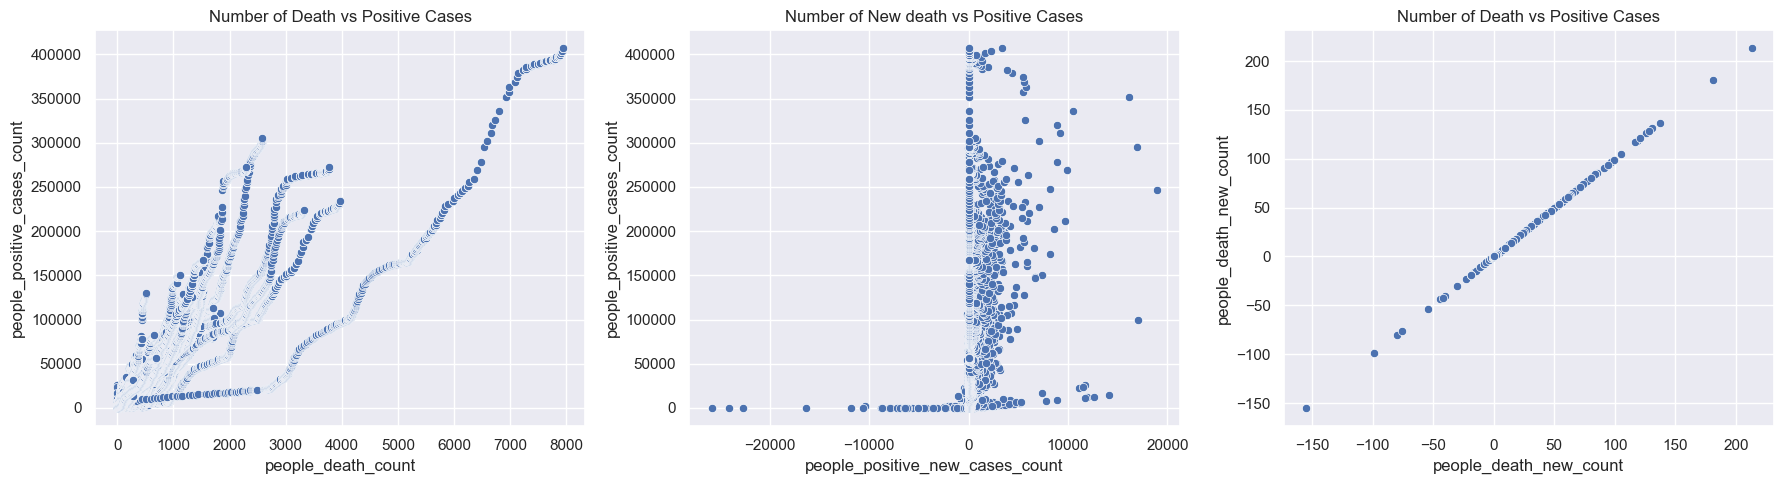

,people_death_new_count,people_positive_new_cases_count,people_death_count,people_positive_cases_count
people_death_new_count,1.000000,0.281170,0.321959,0.276392
people_positive_new_cases_count,0.281170,1.000000,0.280309,0.301181
people_death_count,0.321959,0.280309,1.000000,0.896401
people_positive_cases_count,0.276392,0.301181,0.896401,1.000000


In [ ]:
# Correlation analysis focusing on people_death_new_count and people_positive_new_cases_count with people_positive_cases_count
Covid = ['people_death_new_count', 'people_positive_new_cases_count', 'people_death_count', 'people_positive_cases_count']
correlation_matrix_Covid = Covid_19[Covid].corr()

# Visual Exploration: Scatter plots for each death count vs people_positive_cases_count
plt.figure(figsize=(18, 5))

# Death count and people_positive_cases_count
plt.subplot(1, 3, 1)
sns.scatterplot(x='people_death_count', y='people_positive_cases_count', data=Covid_19)
plt.title('Number of Death vs Positive Cases')

# Number of people_death_new_count and people_positive_cases_count
plt.subplot(1, 3, 2)
sns.scatterplot(x='people_positive_new_cases_count', y='people_positive_cases_count', data=Covid_19)
plt.title('Number of New death vs Positive Cases')

# people_death_new_count and people_death_new_count
plt.subplot(1, 3, 3)
sns.scatterplot(x='people_death_new_count', y='people_death_new_count', data=Covid_19)
plt.title('Number of Death vs Positive Cases')

plt.tight_layout()
plt.show()

correlation_matrix_Covid

The data reveals a significant positive correlation between the number of new deaths and the count of confirmed positive COVID-19 cases. This suggests a strong relationship between COVID-19 related deaths and the number of positive cases identified.

Text(0.5, 1.0, 'Number of Death vs Positive Cases')

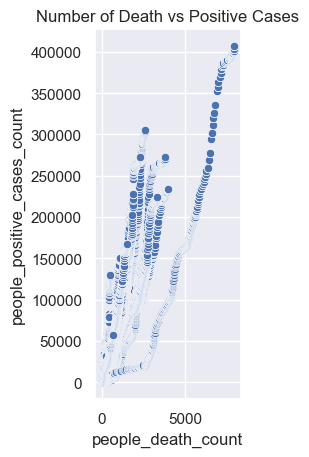

In [ ]:
# Death count and people_positive_cases_count
plt.subplot(1, 3, 1)
sns.scatterplot(x='people_death_count', y='people_positive_cases_count', data=Covid_19)
plt.title('Number of Death vs Positive Cases')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error, r2_score

# Training a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Training a Support Vector Regressor
svr_model = SVR(C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluating the Random Forest model
r2_score_rf = r2_score(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

# Evaluating the Support Vector Regressor
r2_score_svr = r2_score(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)

(r2_score_rf, rmse_rf), (r2_score_svr, rmse_svr)

((0.9999994201874272, 15.94294028500894),
 (0.2576463801811566, 18039.72947206431))

#### Time Series Analysis
* A-line plot tracking the trend of COVID-19-positive cases and deaths over time.

/var/folders/k_/ynncgkcj0j7d7nk5gy9qdwr80000gn/T/ipykernel_15188/3306195061.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_series = Covid_19.groupby('Date').sum()


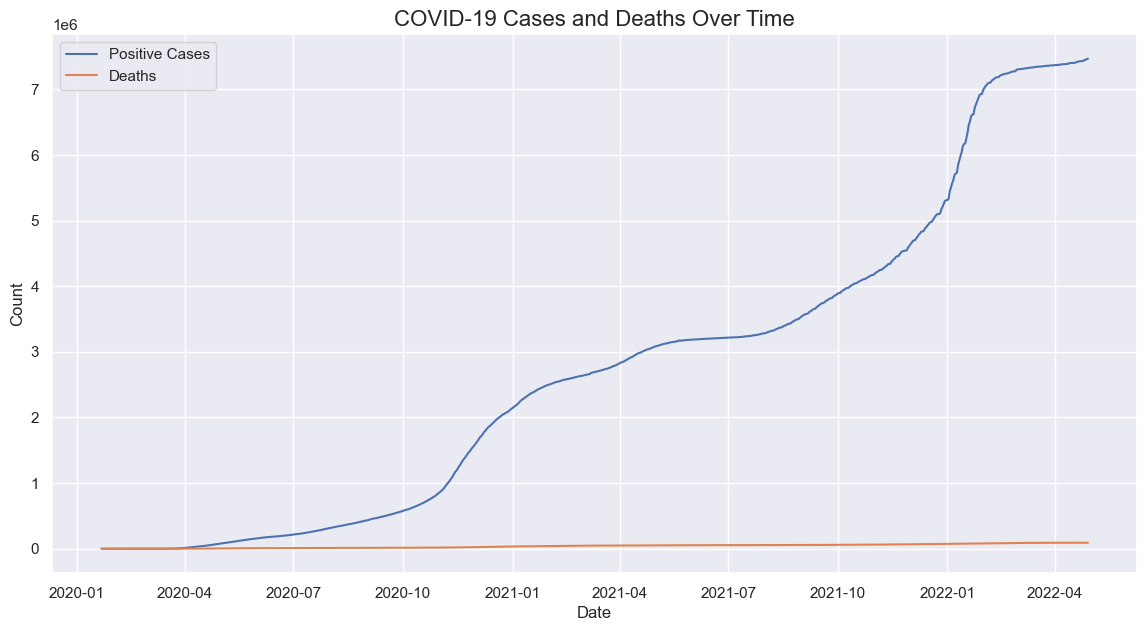

In [ ]:
# Convert the Date column to datetime
Covid_19['Date'] = pd.to_datetime(Covid_19['Date'])

# Group by Date and sum up the cases and deaths
time_series = Covid_19.groupby('Date').sum()

# Plot the trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series, x=time_series.index, y='people_positive_cases_count', label='Positive Cases')
sns.lineplot(data=time_series, x=time_series.index, y='people_death_count', label='Deaths')
plt.title('COVID-19 Cases and Deaths Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Correlation Heatmap
* Understanding the relationships between variables such as cases, deaths, and new case

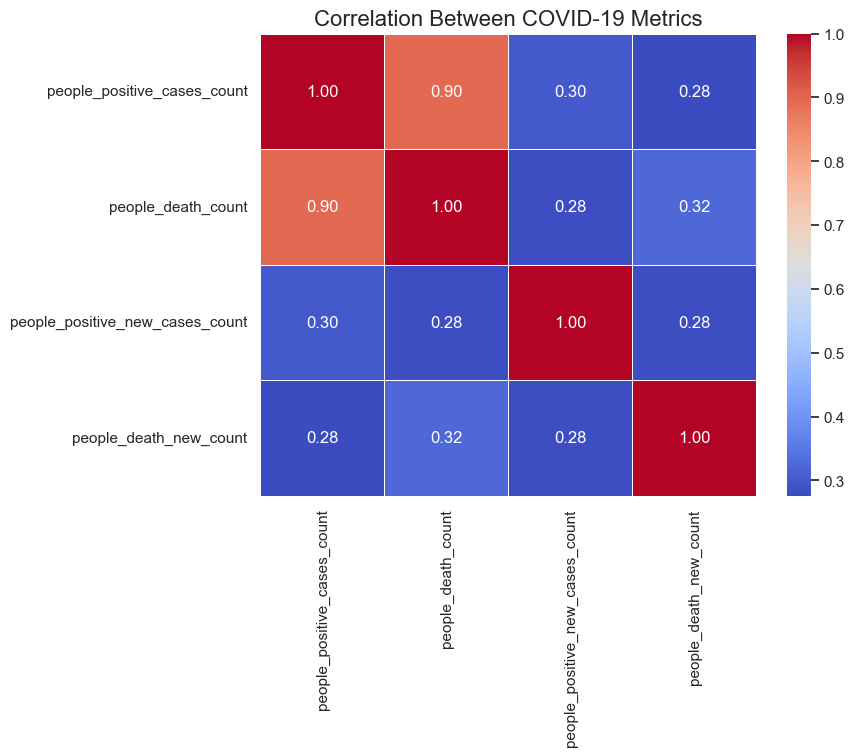

In [ ]:
# Calculate correlation
correlation_matrix = Covid_19[['people_positive_cases_count', 'people_death_count',
                               'people_positive_new_cases_count', 'people_death_new_count']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between COVID-19 Metrics', fontsize=16)
plt.show()

#### County-Level Bar Chart
* Identify counties with the highest number of cases or deaths.

/var/folders/k_/ynncgkcj0j7d7nk5gy9qdwr80000gn/T/ipykernel_15188/1507517497.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_data = Covid_19.groupby('county').sum().sort_values(by='people_positive_cases_count', ascending=False).head(10)


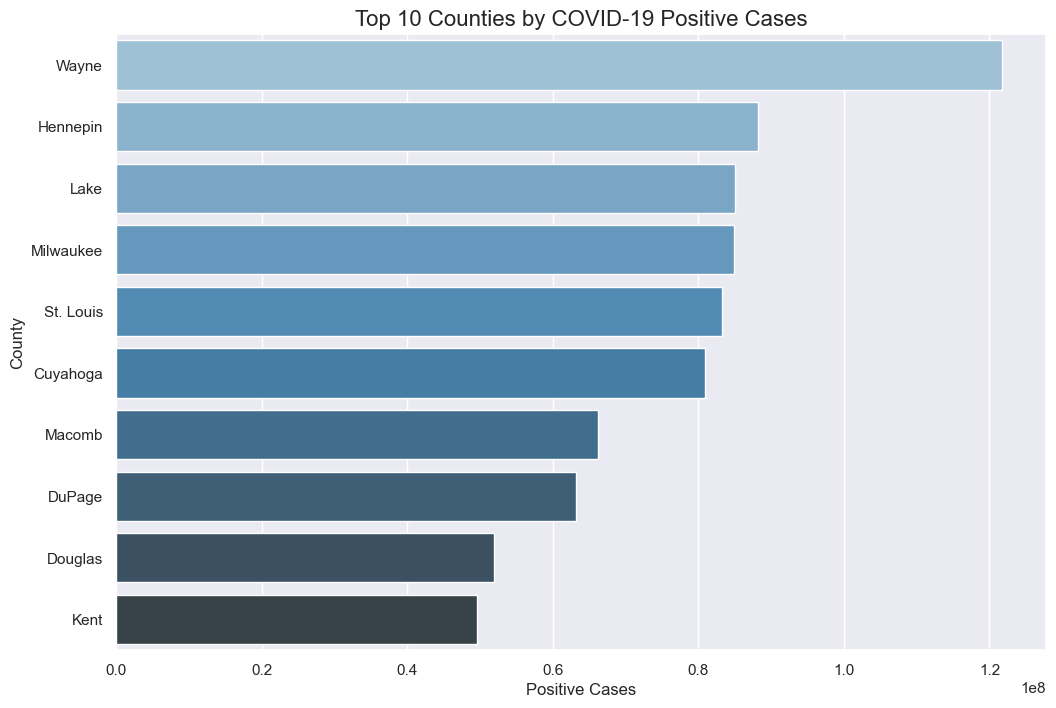

In [ ]:
# Aggregate data by County
county_data = Covid_19.groupby('county').sum().sort_values(by='people_positive_cases_count', ascending=False).head(10)

# Plot the top 10 counties
plt.figure(figsize=(12, 8))
sns.barplot(data=county_data.reset_index(), x='people_positive_cases_count', y='county', palette='Blues_d')
plt.title('Top 10 Counties by COVID-19 Positive Cases', fontsize=16)
plt.xlabel('Positive Cases')
plt.ylabel('County')
plt.show()

#### Case Growth by County
* Comparing the growth rate of cases across counties.

/var/folders/k_/ynncgkcj0j7d7nk5gy9qdwr80000gn/T/ipykernel_15188/1931924904.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_data = county_filtered[county_filtered['county'] == county].groupby('Date').sum()
/var/folders/k_/ynncgkcj0j7d7nk5gy9qdwr80000gn/T/ipykernel_15188/1931924904.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_data = county_filtered[county_filtered['county'] == county].groupby('Date').sum()
/var/folders/k_/ynncgkcj0j7d7nk5gy9qdwr80000gn/T/ipykernel_15188/1931924904.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

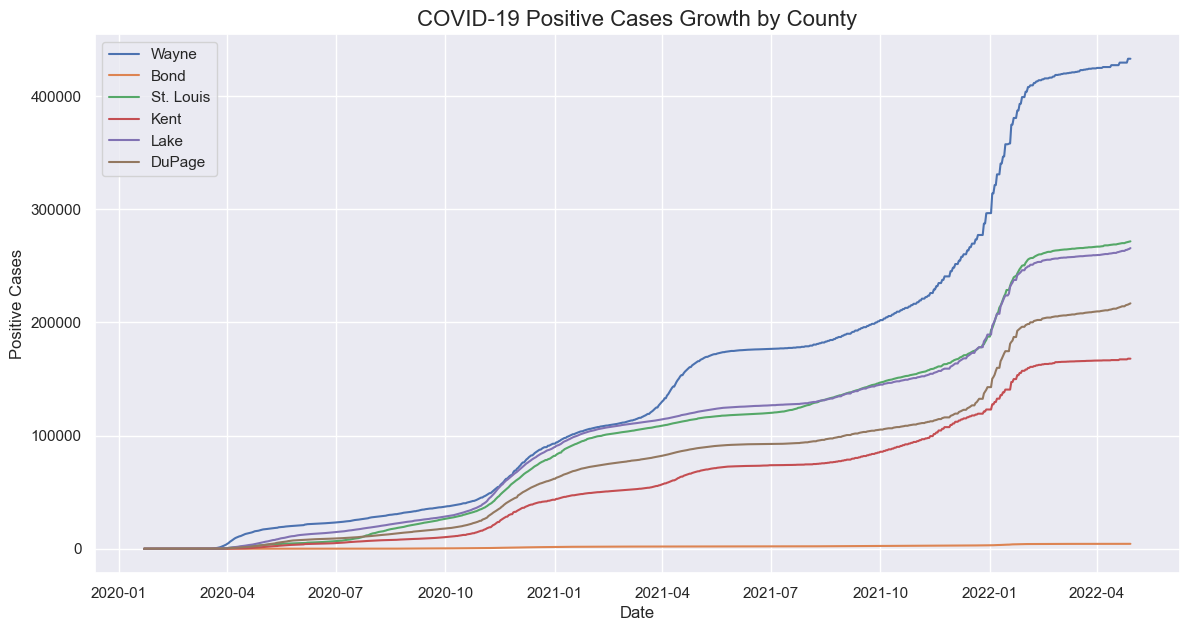

In [ ]:
# Filter for a few counties
selected_counties = ['Wayne', 'Bond', 'St. Louis', 'Kent', 'Raccine', 'Lake', 'Milwukee', 'DuPage', 'Cook']
county_filtered = Covid_19[Covid_19['county'].isin(selected_counties)]

# Group and plot
plt.figure(figsize=(14, 7))
for county in selected_counties:
    county_data = county_filtered[county_filtered['county'] == county].groupby('Date').sum()
    sns.lineplot(data=county_data, x=county_data.index, y='people_positive_cases_count', label=county)

plt.title('COVID-19 Positive Cases Growth by County', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.legend()
plt.show()